In [26]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
import numpy as np
import seaborn as sns

In [2]:
csv_data = pd.read_csv("GGTimur2.csv")

        Temperatur       Hujan  Kelembapan     Insiden       Hasil  \
count   411.000000  411.000000  411.000000  411.000000  411.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     27.579205   48.091484   78.721759   13.177616   13.245742   
std       0.906868   55.389659    5.579518   12.919453   12.950015   
min      24.250000    0.000000   57.821429    0.000000    0.000000   
25%      27.119643    4.000000   75.696429    6.000000    6.000000   
50%      27.528571   31.600000   80.000000   10.000000   10.000000   
75%      28.030357   72.500000   82.696429   15.500000   16.000000   
max      33.428571  402.200000   90.607143  100.000000  100.000000   

            Classn Classc  
count   411.000000    411  
unique         NaN      3  
top            NaN      A  
freq           NaN    351  
mean      1.158151 

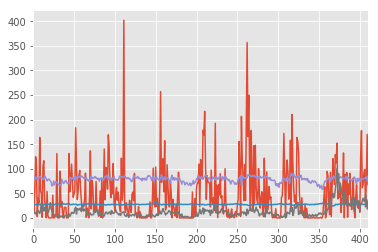

In [3]:
print(csv_data.describe(include='all'))
csv_data['Hujan'].plot()
csv_data['Temperatur'].plot()
csv_data['Kelembapan'].plot()
csv_data['Insiden'].plot()

In [4]:
print(csv_data.isnull().values.any())

False


In [5]:
csv_data.isnull().sum()

Temperatur    0
Hujan         0
Kelembapan    0
Insiden       0
Hasil         0
Classn        0
Classc        0
dtype: int64

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [7]:
features = csv_data[["Hujan","Temperatur","Kelembapan","Insiden"]]
target = csv_data["Classn"]

In [8]:
feature_train = features[features.index < 255]
target_train = target[target.index < 255]  

feature_test = features[(features.index > 255) & (features.index <360)]    
target_test = target[(target.index > 255)  & (target.index <360)]

In [9]:
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=.2, random_state=300)

In [10]:
model=RandomForestClassifier(n_estimators=500, random_state=1,  max_features = 4, max_depth = 4)

In [11]:
fitted_model = model.fit(feature_train, target_train)

In [12]:
predictions = fitted_model.predict(feature_test)

In [13]:
print(confusion_matrix(target_test, predictions))

[[68  2  0]
 [ 4  6  1]
 [ 0  1  1]]


In [14]:
print(accuracy_score(target_test, predictions))

0.9036144578313253


In [16]:
from sklearn.cluster import KMeans

In [17]:
dataklus = csv_data.drop(["Hujan", "Kelembapan", "Classn","Classc","Insiden","Temperatur"], axis = 1)
dataklus.head()

,Hasil
0,13
1,10
2,8
3,13
4,13


In [21]:
y_array = np.array(dataklus)
print(y_array)

[[ 13]
 [ 10]
 [  8]
 [ 13]
 [ 13]
 [ 15]
 [ 12]
 [  9]
 [ 16]
 [ 31]
 [ 15]
 [ 26]
 [ 14]
 [ 21]
 [ 14]
 [ 22]
 [ 16]
 [ 11]
 [ 14]
 [ 20]
 [ 31]
 [ 19]
 [ 14]
 [ 10]
 [  5]
 [  6]
 [  5]
 [  3]
 [  2]
 [  5]
 [  6]
 [  2]
 [  2]
 [  4]
 [  3]
 [  1]
 [  3]
 [  0]
 [  5]
 [  5]
 [  4]
 [  6]
 [  3]
 [  8]
 [  3]
 [  7]
 [ 11]
 [ 11]
 [  9]
 [ 10]
 [ 19]
 [ 22]
 [  8]
 [ 19]
 [ 18]
 [ 16]
 [ 19]
 [ 20]
 [ 13]
 [ 24]
 [ 18]
 [ 14]
 [ 18]
 [ 16]
 [ 16]
 [  6]
 [  6]
 [  6]
 [  8]
 [ 10]
 [  6]
 [  6]
 [  7]
 [  7]
 [ 14]
 [ 11]
 [ 13]
 [ 15]
 [ 17]
 [  7]
 [ 10]
 [  5]
 [ 11]
 [  9]
 [  5]
 [  4]
 [  4]
 [  9]
 [ 12]
 [ 11]
 [  8]
 [  9]
 [ 12]
 [ 12]
 [  7]
 [ 15]
 [ 11]
 [  9]
 [ 10]
 [ 12]
 [ 17]
 [ 11]
 [ 10]
 [  8]
 [  6]
 [  9]
 [  5]
 [  9]
 [ 11]
 [ 12]
 [ 12]
 [  5]
 [  4]
 [  3]
 [  9]
 [  5]
 [  1]
 [  5]
 [  6]
 [  4]
 [  6]
 [  7]
 [  7]
 [  4]
 [  8]
 [  7]
 [  6]
 [  3]
 [  6]
 [  8]
 [  7]
 [  7]
 [  0]
 [  3]
 [  2]
 [  2]
 [  3]
 [  1]
 [  6]
 [  4]
 [  6]
 [  4]
 [  5]

In [30]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 3, random_state=1234)
# Menentukan kluster dari data
kmeans.fit(y_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [31]:
print(kmeans.cluster_centers_)

[[ 8.2293578 ]
 [26.85714286]
 [62.35714286]]


In [32]:
# Menampilkan hasil kluster
print(kmeans.labels_)
# Menambahkan kolom "kluster" dalam data frame ritel
csv_data["kluster"] = kmeans.labels_
csv_data.tail()

[0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 2
 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 2
 1 1 1 1]


,Temperatur,Hujan,Kelembapan,Insiden,Hasil,Classn,Classc,kluster
406,27.500000,98.6,80.785714,34,48,2,B,2
407,27.617857,22.6,79.892857,48,32,2,B,1
408,27.235714,79.6,83.642857,32,18,1,A,1
409,28.675000,170.0,74.892857,18,36,2,B,1
410,26.807143,67.4,85.357143,36,33,2,B,1


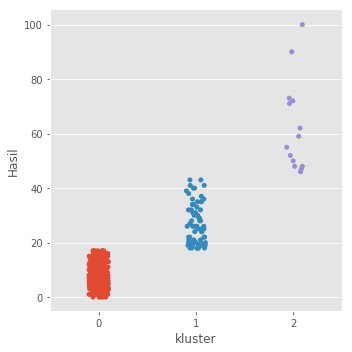

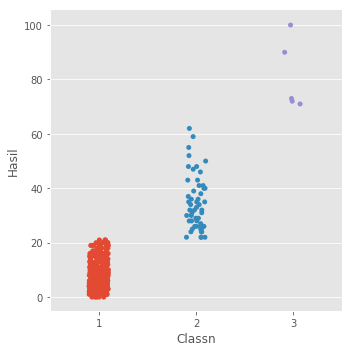

In [33]:
sns.catplot(x="kluster", y="Hasil", data=csv_data, s=5, alpha = 1)
sns.catplot(x="Classn", y="Hasil", data=csv_data, s=5, alpha = 1)

In [38]:
features1 = csv_data[["Hujan","Temperatur","Kelembapan","Insiden"]]
target1 = csv_data["kluster"]

In [39]:
feature_train1, feature_test1, target_train1, target_test1 = train_test_split(features1, target1, test_size=.2, random_state=300)

In [40]:
model1=RandomForestClassifier(n_estimators=500, random_state=1,  max_features = 4, max_depth = 4)

In [41]:
fitted_model1 = model.fit(feature_train1, target_train1)

In [42]:
predictions1 = fitted_model1.predict(feature_test1)

In [59]:
print(confusion_matrix(target_test1, predictions1))
print(accuracy_score(target_test1, predictions1))

[[63  3  0]
 [ 7  6  0]
 [ 0  2  2]]
0.8554216867469879


In [46]:
import imblearn
from imblearn.over_sampling import SMOTE

In [47]:
sm = SMOTE(random_state=12)

In [50]:
feature_train_res1, target_train_res1 = sm.fit_sample(feature_train1, target_train1)

In [55]:
fitted_modelres1 = model.fit(feature_train_res1, target_train_res1)

In [56]:
predictionsres1 = fitted_modelres1.predict(feature_test1)

In [57]:
print(confusion_matrix(target_test1, predictionsres1))
print(accuracy_score(target_test1, predictionsres1))

[[48 18  0]
 [ 2 11  0]
 [ 0  2  2]]
0.7349397590361446
